# STL monitoring over reachsets

In [1]:
var('x y')

(x, y)

In [2]:
from sage.rings.real_interval_absolute import RealIntervalAbsoluteField
R = RealIntervalAbsoluteField(1)

In [3]:
R(0.1)

1.?

In [4]:
def lower(f, x):
    return float(f(R(x)).lower())
def upper(f, x):
    return float(f(R(x)).upper())

In [5]:
lower(sin, 0.4)

0.0

In [6]:
from functools import partial

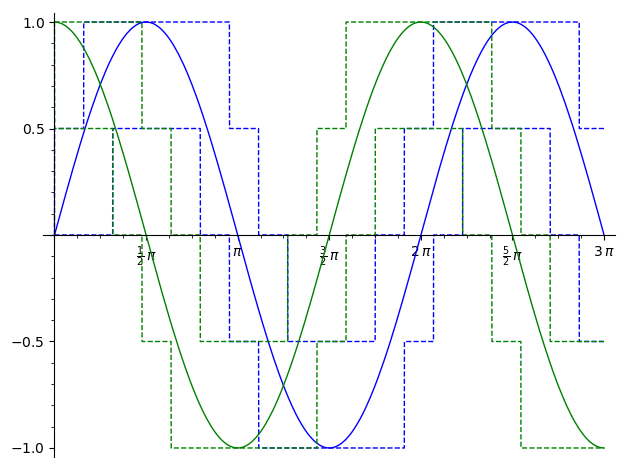

In [7]:
plot([partial(lower, sin), sin, partial(upper, sin), partial(lower, cos), cos, partial(upper, cos)], xmin=0, xmax=3*pi,
     color=['blue', 'blue', 'blue', 'green', 'green', 'green'],
     linestyle=['--', '-', '--', '--', '-', '--'],
     ticks=(pi/2,0.5), tick_formatter=pi)

/usr/lib64/python2.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'label'
  s)


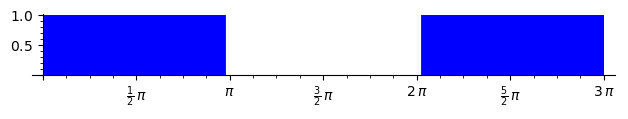

In [8]:
region_plot((lambda x,_: sin(x) >= 0), (0, 3*pi), (0,1),
            ticks=(pi/2,0.5), tick_formatter=pi)

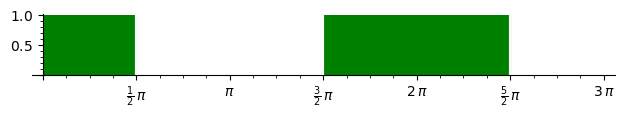

In [9]:
region_plot((lambda x,_: cos(x) >= 0), (0, 3*pi), (0,1),
            incol='green', ticks=(pi/2, 0.5), tick_formatter=pi)

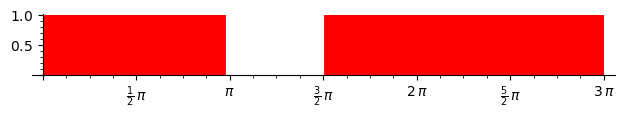

In [10]:
region_plot((lambda x,_: cos(x) >= 0 or sin(x) >= 0), (0, 3*pi), (0,1),
            incol='red', ticks=(pi/2,0.5), tick_formatter=pi)

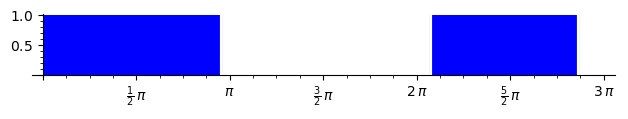

In [11]:
region_plot((lambda x,_: lower(sin, x) >= 0), (0, 3*pi), (0,1),
            ticks=(pi/2,0.5), tick_formatter=pi)

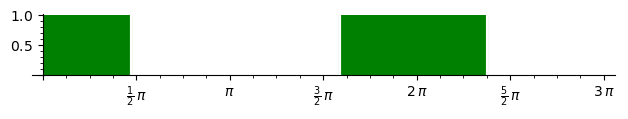

In [12]:
region_plot((lambda x,_: lower(cos, x) >= 0), (0, 3*pi), (0,1),
            incol='green', ticks=(pi/2, 0.5), tick_formatter=pi)

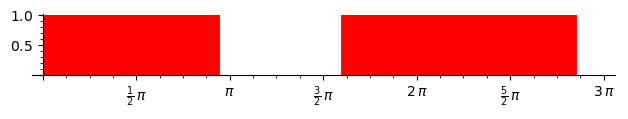

In [13]:
region_plot((lambda x,_: lower(cos, x) >= 0 or lower(sin, x) >= 0),
            (0, 3*pi), (0,1), incol='red',
            ticks=(pi/2,0.5), tick_formatter=pi)

$\mathrm G_{\left[2 \pi, \frac{5\pi}{2}\right]}(c \geq 0) \vee \mathrm G_{\left[2 \pi, \frac{5\pi}{2}\right]}(s \geq 0)$ is false, looking at atomic propositions, however, $\mathrm G_{\left[2 \pi, \frac{5\pi}{2}\right]}(s \geq 0 \vee c \geq 0)$, is true

inner intervals:

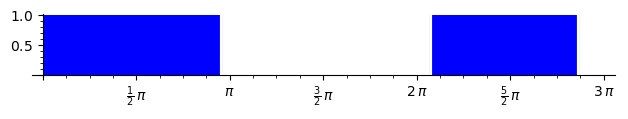

In [14]:
region_plot((lambda x,_: lower(sin, x) >= 0), (0, 3*pi), (0,1),
            ticks=(pi/2,0.5), tick_formatter=pi)

outer intervals:

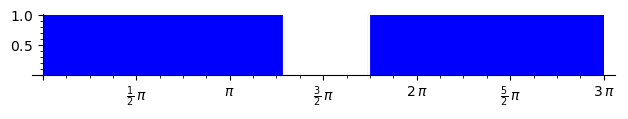

In [15]:
region_plot((lambda x,_: upper(sin, x) >= 0), (0, 3*pi), (0,1), 
            ticks=(pi/2,0.5), tick_formatter=pi)

Another example:

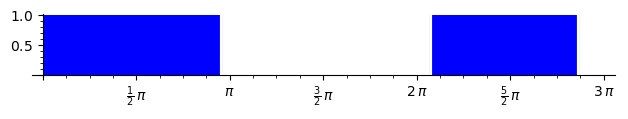

In [16]:
region_plot((lambda x,_: lower(sin, x) >= 0), (0, 3*pi), (0,1), 
            ticks=(pi/2,0.5), tick_formatter=pi)

In [17]:
#region_plot((lambda x,_: lower(sin, x - pi) >= 0), (0, 3*pi), (0,1),
#            ticks=(pi/2,0.5), tick_formatter=pi)

In [18]:
#region_plot((lambda x,_: lower(sin, x) >= 0 or lower(sin, x - pi) >= 0),
#(0, 3*pi), (0,1), ticks=(pi/2,0.5), tick_formatter=pi)

In [19]:
#region_plot((lambda x,_: lower(sin, x) >= 0.2), (0, 3*pi), (0,1), 
#ticks=(pi/2,0.5), tick_formatter=pi)

In [20]:
#region_plot((lambda x,_: sin(x - pi) >= 0.2), (0, 3*pi), (0,1),
#            ticks=(pi/2,0.5), tick_formatter=pi)

Noncompositionality:

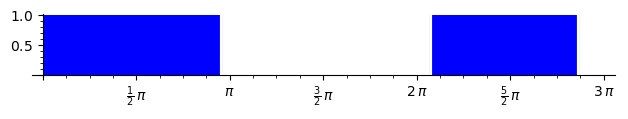

In [21]:
region_plot((lambda x,_: lower(sin, x) >= 0),
            (0, 3*pi), (0,1), ticks=(pi/2,0.5), tick_formatter=pi)

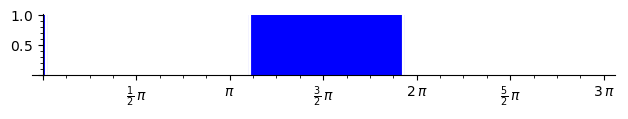

In [22]:
region_plot((lambda x,_: upper(sin, x) <= 0),
            (0, 3*pi), (0,1), ticks=(pi/2,0.5), tick_formatter=pi)

/usr/lib64/python2.7/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


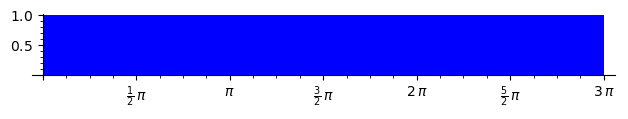

In [23]:
region_plot((lambda x,_: lower(sin, x) <= 0 or lower(sin, x) >= 0),
            (0, 3*pi), (0,1), ticks=(pi/2,0.5), tick_formatter=pi)

In [24]:
def interval(s):
    return RIF(min(s), max(s))

In [25]:
interval([1,2,5]).str(style='brackets')

'[1.0000000000000000 .. 5.0000000000000000]'

In [26]:
RIF(-1,2).intersection(RIF(1,3)).str(style='brackets')

'[1.0000000000000000 .. 2.0000000000000000]'

In [27]:
def isub(a, b):
    al, au = a.endpoints()
    bl, bu = b.endpoints()
    if al <= bl <= au <= bu:
        return RIF(bl, au)
    elif bl <= al <= bu <= au:
        return RIF(al, bu)
    else:
        return a

In [28]:
isub(RIF(0,2), RIF(-1,1)).str(style='brackets')

'[0.00000000000000000 .. 1.0000000000000000]'

In [29]:
isub(RIF(0,2), RIF(0.5,1.5)).str(style='brackets')

'[0.00000000000000000 .. 2.0000000000000000]'

In [30]:
isub(RIF(0,2), RIF(-1,1)).str(style='brackets')

'[0.00000000000000000 .. 1.0000000000000000]'

In [31]:
def extdiv(a, b, d):
    al, au = a.endpoints()
    bl, bu = b.endpoints()
    if 0 not in b:
        return (a/b).intersection(d)
    elif al > 0:
        return isub(d, RIF(al/bl, al/bu))
    elif au < 0:
        return isub(d, RIF(au/bu, au/bl))
    else:
        return d

In [32]:
extdiv(RIF(3,4), RIF(1,2), RIF(1,5)).str(style='brackets')

'[1.5000000000000000 .. 4.0000000000000000]'

In [33]:
extdiv(RIF(3,4), RIF(0,2), RIF(1,5)).str(style='brackets')

'[1.5000000000000000 .. 5.0000000000000000]'

In [34]:
RIF(1,2).center()

1.50000000000000

In [35]:
def newton(f, fprime, x0, n):
    x = RIF(x0)
    for i in range(n):
        xc = RIF(x.center())
#         x = (xc - f(xc)/fprime(x)).intersection(x)
        x = xc + extdiv(-f(xc), fprime(x), x - xc)
        print "f({}) = {}".format(i, x.str(style='brackets')
                                  if x.diameter() > 0.1 else x)
    return x

In [36]:
f      = lambda x: x**2 - 2
fprime = lambda x: 2*x

In [37]:
sqrt(2.0)

1.41421356237310

In [38]:
newton(f, fprime, RIF(1.4,1.45), 15)

f(0) = 1.415?
f(1) = 1.41421356?
f(2) = 1.414213562373095?
f(3) = 1.414213562373095?
f(4) = 1.414213562373095?
f(5) = 1.414213562373095?
f(6) = 1.414213562373095?
f(7) = 1.414213562373095?
f(8) = 1.414213562373095?
f(9) = 1.414213562373095?
f(10) = 1.414213562373095?
f(11) = 1.414213562373095?
f(12) = 1.414213562373095?
f(13) = 1.414213562373095?
f(14) = 1.414213562373095?


1.414213562373095?

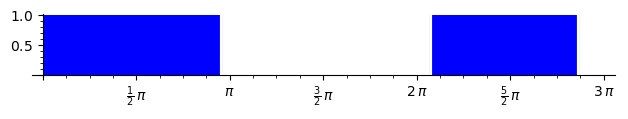

In [39]:
region_plot((lambda x,_: lower(sin, x) >= 0), (0, 3*pi), (0,1), 
            ticks=(pi/2,0.5), tick_formatter=pi)

In [40]:
def lower(f, I, x):
    return float(f(x + I).endpoints()[0])
def upper(f, I, x):
    return float(f(x + I).endpoints()[1])

In [41]:
I = RIF(-0.3,0.3)

In [42]:
g = lambda x: sin(x+I)
gprime = lambda x: cos(x+I)

In [43]:
x0 = newton(g, gprime, RIF(-pi/4,pi/4),15)

f(0) = [-0.63340159272047103 .. 0.63340159272047103]
f(1) = [-0.49658603143445352 .. 0.49658603143445352]
f(2) = [-0.42268397111483092 .. 0.42268397111483092]
f(3) = [-0.39400947238022361 .. 0.39400947238022361]
f(4) = [-0.38444771270454759 .. 0.38444771270454759]
f(5) = [-0.38143040832528236 .. 0.38143040832528236]
f(6) = [-0.38049526589605954 .. 0.38049526589605954]
f(7) = [-0.38020707230770845 .. 0.38020707230770845]
f(8) = [-0.38011841133911179 .. 0.38011841133911179]
f(9) = [-0.38009115000821859 .. 0.38009115000821859]
f(10) = [-0.38008276912492040 .. 0.38008276912492040]
f(11) = [-0.38008019274181105 .. 0.38008019274181105]
f(12) = [-0.38007940074341390 .. 0.38007940074341390]
f(13) = [-0.38007915727867303 .. 0.38007915727867303]
f(14) = [-0.38007908243635936 .. 0.38007908243635936]


In [44]:
x1 = newton(g, gprime, RIF(3*pi/4,5*pi/4),15)

f(0) = [2.5081910608693198 .. 3.7749942463102660]
f(1) = [2.6450066221553374 .. 3.6381786850242493]
f(2) = [2.7189086824749604 .. 3.5642766247046259]
f(3) = [2.7475831812095683 .. 3.5356021259700184]
f(4) = [2.7571449408852446 .. 3.5260403662943421]
f(5) = [2.7601622452645098 .. 3.5230230619150765]
f(6) = [2.7610973876937330 .. 3.5220879194858537]
f(7) = [2.7613855812820840 .. 3.5217997258975027]
f(8) = [2.7614742422506806 .. 3.5217110649289061]
f(9) = [2.7615015035815737 .. 3.5216838035980130]
f(10) = [2.7615098844648717 .. 3.5216754227147145]
f(11) = [2.7615124608479812 .. 3.5216728463316054]
f(12) = [2.7615132528463783 .. 3.5216720543332083]
f(13) = [2.7615134963111191 .. 3.5216718108684671]
f(14) = [2.7615135711534328 .. 3.5216717360261534]


In [45]:
x2 = newton(g, gprime, RIF(7*pi/4,9*pi/4),15)

f(0) = [5.6497837144591107 .. 6.9165868999000609]
f(1) = [5.7865992757451278 .. 6.7797713386140455]
f(2) = [5.8605013360647513 .. 6.7058692782944212]
f(3) = [5.8891758347993601 .. 6.6771947795598133]
f(4) = [5.8987375944750359 .. 6.6676330198841365]
f(5) = [5.9017548988543016 .. 6.6646157155048709]
f(6) = [5.9026900412835248 .. 6.6636805730756486]
f(7) = [5.9029782348718757 .. 6.6633923794872976]
f(8) = [5.9030668958404728 .. 6.6633037185187006]
f(9) = [5.9030941571713659 .. 6.6632764571878074]
f(10) = [5.9031025380546635 .. 6.6632680763045090]
f(11) = [5.9031051144377730 .. 6.6632654999213994]
f(12) = [5.9031059064361706 .. 6.6632647079230028]
f(13) = [5.9031061499009114 .. 6.6632644644582620]
f(14) = [5.9031062247432251 .. 6.6632643896159483]


In [46]:
x3 = newton(g, gprime, RIF(11*pi/4,13*pi/4),15)

f(0) = [8.7913763680489029 .. 10.058179553489858]
f(1) = [8.9281919293349201 .. 9.9213639922038404]
f(2) = 10.?
f(3) = 10.?
f(4) = 10.?
f(5) = 10.?
f(6) = 10.?
f(7) = 10.?
f(8) = 10.?
f(9) = 10.?
f(10) = 10.?
f(11) = 10.?
f(12) = 10.?
f(13) = 10.?
f(14) = 10.?


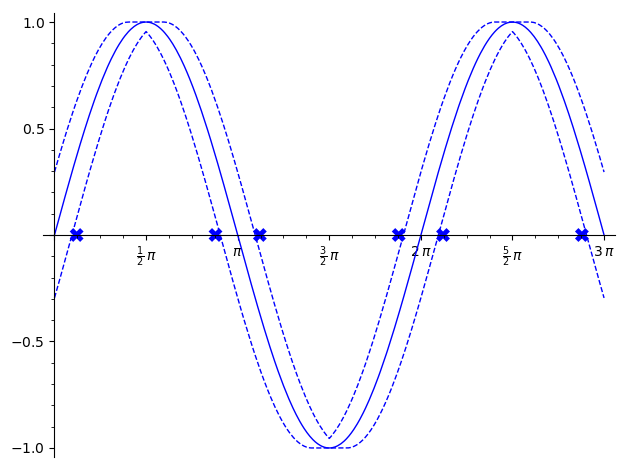

In [47]:
p = plot([partial(lower, sin, I), sin, partial(upper, sin, I)], 
         xmin=0, xmax=3*pi,
         color=['blue', 'blue', 'blue', 'green', 'green', 'green'],
         linestyle=['--', '-', '--', '--', '-', '--'],
         ticks=(pi/2,0.5), tick_formatter=pi)
p += point((x0.endpoints()[1], 0), marker='X', size=100)
p += point((x1.endpoints()[0], 0), marker='X', size=100)
p += point((x1.endpoints()[1], 0), marker='X', size=100)
p += point((x2.endpoints()[0], 0), marker='X', size=100)
p += point((x2.endpoints()[1], 0), marker='X', size=100)
p += point((x3.endpoints()[0], 0), marker='X', size=100)
p

In [490]:
def shift_plot(t0):
    def shift_sin_c(t):
        try:
            return sin((t + t0).center())
        except AttributeError:
            return sin(t + t0)
        
    if t0 not in RIF:
        t0 = RIF(t0)
        
    shift_sin = lambda t: sin(t + t0)
    
    p = plot([partial(lower, shift_sin, I),
              (lambda t: sin(t + t0.lower())),
              (lambda t: sin(t + t0.upper())),
              partial(upper, shift_sin, I)], 
         xmin=0, xmax=3*pi,
         color=['blue', 'blue', 'blue', 'blue'],
         linestyle=['--', '-', '-', '--'],
         ticks=(pi/2,0.5), tick_formatter=pi)
    return p

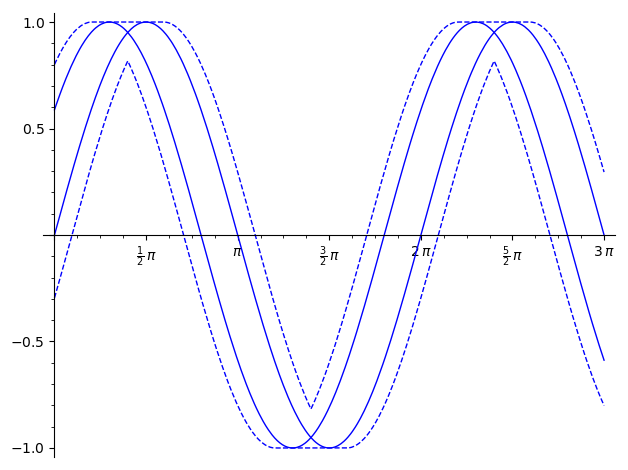

In [491]:
shift_plot(RIF(0,pi/5))

In [50]:
intervals = [(RIF(x0.endpoints()[1], x1.endpoints()[0]),True),
             (RIF(x1.endpoints()[1], x2.endpoints()[0]),False),
             (RIF(x2.endpoints()[1], x3.endpoints()[0]),True)   ]

In [51]:
[(x.endpoints(), v) for x, v in intervals]

[((0.380079082436359, 2.76151357115344), True),
 ((3.52167173602615, 5.90310622474323), False),
 ((6.66326438961594, 9.04469887833302), True)]

In [52]:
def shift_elem(t, xs):
    tl, tu = t.endpoints()
    return [(x - tl if b else x - tu, b) for (x, b) in xs]

In [53]:
def invert(xs):
    return sum(([(xc, not b) for xc in complements(x)] for x, b in xs), [])

In [54]:
def join(xs, ys):
    return xs + ys

In [55]:
def truth_value(xs):
    if any(0 in x for (x,b) in xs if b):
        return True
    elif any(0 in x for (x,b) in xs if not b):
        return False
    else:
        return 'Unknown'

In [56]:
def truth_at(t, xs):
    return truth_value(shift_elem(RIF(t), xs))

In [57]:
shift_elem(RIF(5), intervals)

[(-1.?e1, True), (0.?e1, False), (1.?e1, True)]

In [58]:
[(x - 5, True) for (x, y) in intervals if y == True]

[(-1.?e1, True), (1.?e1, True)]

In [59]:
truth_at(0, intervals)

'Unknown'

In [60]:
truth_at(pi/2, intervals)

True

In [61]:
truth_at(3*pi/2, intervals)

False

In [62]:
truth_at(pi, intervals)

'Unknown'

In [63]:
def complements(interval):
    l, u = interval.endpoints()
    if l == u:
        return RIF(0,3*pi)
    if l > 0 and u < 3*pi:
        return [RIF(0,l), RIF(0,3*pi)]
    if l > 0:
        return [RIF(l, 3*pi)]
    if u > 0:
        return [RIF(0, u)]
    raise

In [64]:
intervals = [(RIF(x0.endpoints()[1], x1.endpoints()[0]),True),
             (RIF(x0.endpoints()[0], x1.endpoints()[1]),False),
             (RIF(x2.endpoints()[1], x3.endpoints()[0]),True),
             (RIF(x2.endpoints()[0], x3.endpoints()[1]),False)   ]

In [65]:
p = plot([partial(lower, sin, I), sin, partial(upper, sin, I)],
         xmin=0, xmax=3*pi,
         color=['blue', 'blue', 'blue', 'green', 'green', 'green'],
         linestyle=['--', '-', '--', '--', '-', '--'],
         ticks=(pi/2,0.5), tick_formatter=pi)

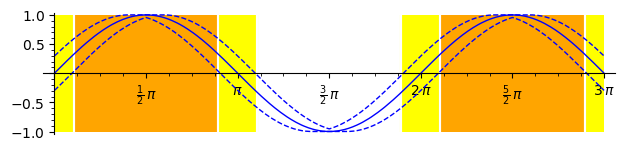

In [66]:
def visualize(intervals):
    inners = lambda x, _: any(b and x in II for II, b in intervals)
    outers = lambda x, _: any(not b and x in II for II, b in intervals)
    p = (region_plot(outers, (0,3*pi), (-1,1), incol='yellow') 
       + region_plot(inners, (0,3*pi), (-1,1), incol='orange'))
    
    return p

# for II, _ in intervals:
#     l, u = II.endpoints()
#     p = point((l, 0), marker='X', size=100) + p
#     p = point((u, 0), marker='X', size=100) + p

p + visualize(intervals)

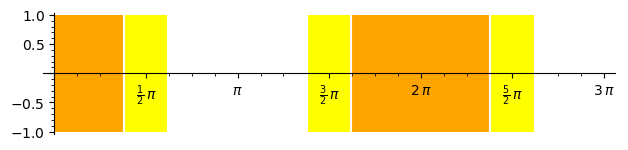

In [67]:
visualize(shift_elem(RIF(pi/2), intervals)).show(ticks=(pi/2,0.5),
                                                 tick_formatter=pi)

In [68]:
intervals

[(1.?e1, True), (0.?e1, False), (1.?e1, True), (1.?e1, False)]

In [69]:
[(x.str(style='brackets'), b) for x, b in invert(intervals)]

[('[0.00000000000000000 .. 0.38007908243635936]', False),
 ('[0.00000000000000000 .. 9.4247779607693812]', False),
 ('[0.00000000000000000 .. 3.5216717360261534]', True),
 ('[0.00000000000000000 .. 6.6632643896159483]', False),
 ('[0.00000000000000000 .. 9.4247779607693812]', False),
 ('[5.9031062247432251 .. 9.4247779607693812]', True)]

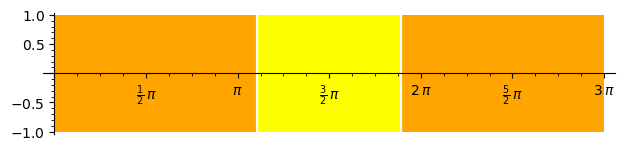

In [70]:
visualize(invert(intervals)).show(ticks=(pi/2,0.5), tick_formatter=pi)

In [71]:
def intersect1(xs, ys):
    return sum(([(x.intersection(y), bx) for x, bx in xs
                 if bx == by and y.overlaps(x)]
               for y, by in ys), [])

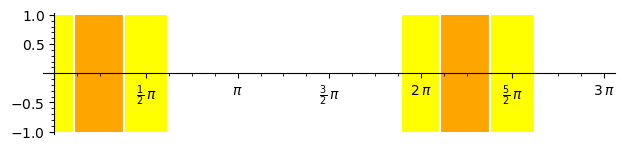

In [72]:
visualize(intersect1(intervals,
                     shift_elem(RIF(pi/2), intervals))
         ).show(ticks=(pi/2,0.5), tick_formatter=pi)

In [73]:
def intersect2(xs, ys):
    return invert(join(invert(xs), invert(ys)))

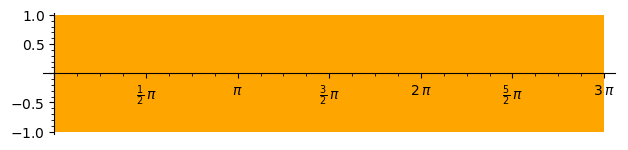

In [74]:
visualize(intersect2(intervals,
                     shift_elem(RIF(pi/2), intervals))
         ).show(ticks=(pi/2,0.5), tick_formatter=pi)

$$ \int\limits_{-\pi}^{\pi} \sin(x)\,\mathrm{d}x $$

In [75]:
intervals = [(RIF(x0.endpoints()[1], x1.endpoints()[0]),True),
             (RIF(x1.endpoints()[1], x2.endpoints()[0]),False),
             (RIF(x2.endpoints()[1], x3.endpoints()[0]),True)   ]

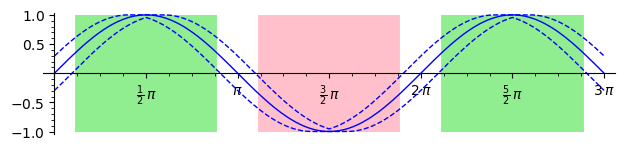

In [76]:
def visualize2c(intervals):
    trues = lambda x, _: any(b and x in II for II, b in intervals)
    falses = lambda x, _: any(not b and x in II for II, b in intervals)
    p = (region_plot(trues, (0,3*pi), (-1,1), incol='lightgreen') 
       + region_plot(falses, (0,3*pi), (-1,1), incol='pink'))
    
    return p

# for II, _ in intervals:
#     l, u = II.endpoints()
#     p = point((l, 0), marker='X', size=100) + p
#     p = point((u, 0), marker='X', size=100) + p

p + visualize2c(intervals)

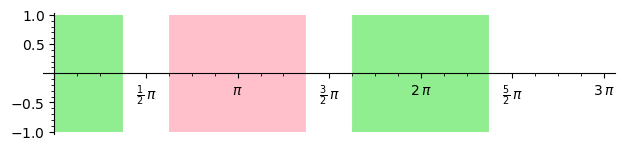

In [77]:
visualize2c(shift_elem(RIF(pi/2),
            intervals)).show(ticks=(pi/2,0.5), tick_formatter=pi)

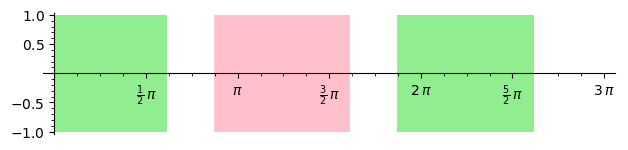

In [78]:
visualize2c(shift_elem(RIF(pi/4),
            intervals)).show(ticks=(pi/2,0.5), tick_formatter=pi)

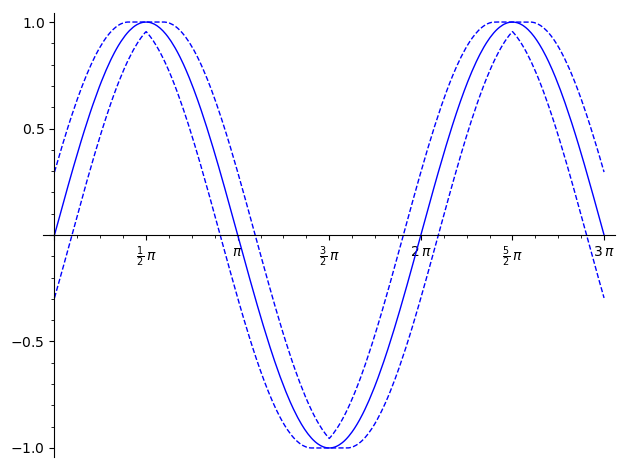

In [79]:
shift_plot(0)

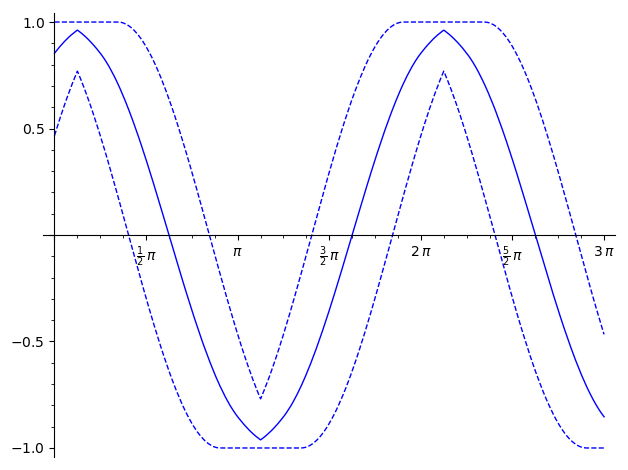

In [80]:
shift_plot(RIF(pi/4,pi/2))

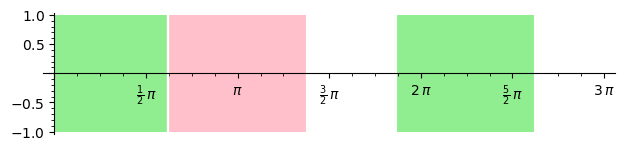

In [81]:
visualize2c(shift_elem(RIF(pi/4,pi/2),
            intervals)).show(ticks=(pi/2,0.5), tick_formatter=pi)

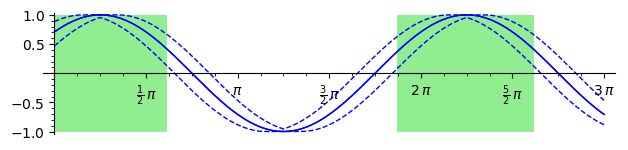

In [511]:
(shift_plot(RIF(pi/4))
    + visualize2c(
        [(x,b) for x, b
             in shift_elem(RIF(pi/4), intervals)
             if b]))

In [83]:
(RIF(1,2) - RIF(0,1)).str(style='brackets')

'[0.00000000000000000 .. 2.0000000000000000]'

In [507]:
def shift_F(J, (I, b)):
    il, iu = I.endpoints()
    if J not in RIF:
        J = RIF(J)
    tl, tu = J.endpoints()
    
    if b:
        return I - J, True
    elif (I - tl).overlaps(I - tu):
        return (I - tl).intersection(I - tu), False
    else:
        return None

In [508]:
def shift_G(J, (I, b)):
    il, iu = I.endpoints()
    if J not in RIF:
        J = RIF(J)
    tl, tu = J.endpoints()
    
    if not b:
        return I - J, False
    elif (I - tl).overlaps(I - tu):
        return (I - tl).intersection(I - tu), True
    else:
        return None

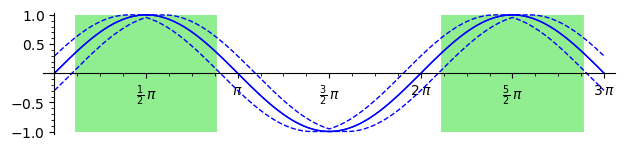

In [492]:
(shift_plot(RIF(0))
    + visualize2c(
        [(x,b) for x, b
             in shift_elem(RIF(0), intervals)
             if b]))

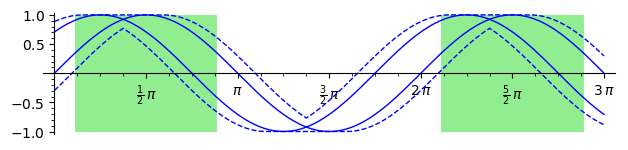

In [495]:
(shift_plot(RIF(0,pi/4))
    + visualize2c(
        [(x,b) for x, b
             in shift_elem(RIF(0,pi/4), intervals)
             if b]))

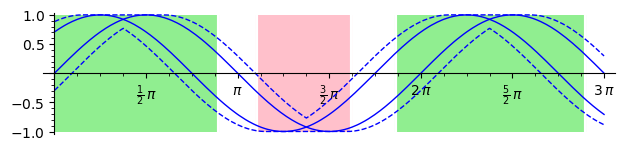

In [496]:
(shift_plot(RIF(0, pi/4))
    + visualize2c(map(partial(shift_F, RIF(0, pi/4)), intervals)))

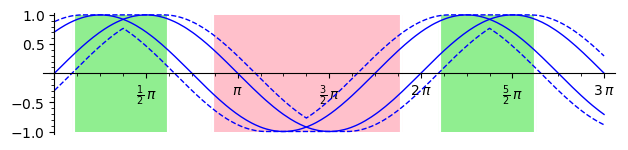

In [498]:
(shift_plot(RIF(0, pi/4))
    + visualize2c(map(partial(shift_G, RIF(0, pi/4)), intervals)))

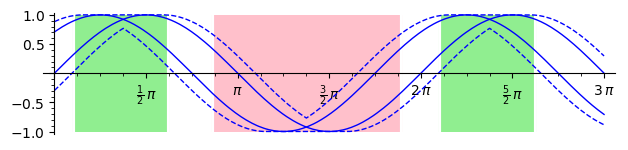

In [501]:
(shift_plot(RIF(0, pi/4))
    + visualize2c(invert3(map(partial(shift_F, RIF(0, pi/4)), invert3(intervals)))))

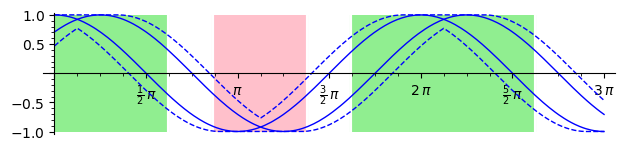

In [502]:
(shift_plot(RIF(pi/4, pi/2))
    + visualize2c(map(partial(shift_F, RIF(pi/4, pi/2)), intervals)))

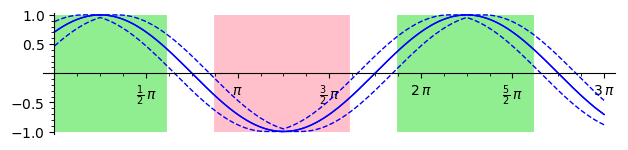

In [509]:
(shift_plot(pi/4)
    + visualize2c(map(partial(shift_F, pi/4), intervals)))

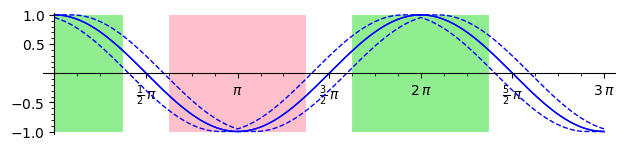

In [510]:
(shift_plot(pi/2)
    + visualize2c(map(partial(shift_F, pi/2), intervals)))

In [87]:
from functools import reduce

In [88]:
def intersect2(xs, ys):
    ointersect = lambda x, y: x.intersection(y)
    ounion     = lambda x, y: x.union(y)
    return ([(reduce(ointersect,
                    (y for y, by in ys if by and y.overlaps(x)),
                    x), True)
                for x, bx in xs if bx]
          + [(reduce(ounion,
                    (y for y, by in ys if not by and y.overlaps(x)),
                    x), False)
                for x, bx in xs if not bx]
          + [(y, False) for y, by in ys if not by
                and not any(x.overlaps(y) for x, bx in xs if not bx)])

In [89]:
intersect2(intervals, shift_elem(RIF(pi/2), intervals))

[(1.?, True), (7.?, True), (1.?e1, False)]

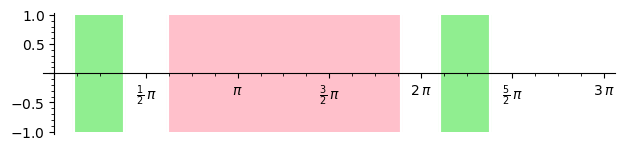

In [90]:
visualize2c(intersect2(intervals, 
                       shift_elem(RIF(pi/2), intervals))
           ).show(ticks=(pi/2,0.5), tick_formatter=pi)

In [91]:
def invert3(xs):
    return [(x, not b) for x, b in xs]

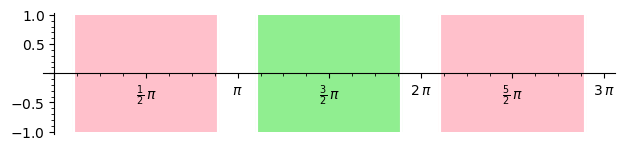

In [92]:
visualize2c(invert3(intervals)).show(ticks=(pi/2,0.5), tick_formatter=pi)

In [196]:
intervals

[(1.?e1, True), (1.?e1, False), (1.?e1, True)]

In [93]:
def union2(xs, ys):
    return invert3(intersect2(invert3(xs), invert3(ys)))

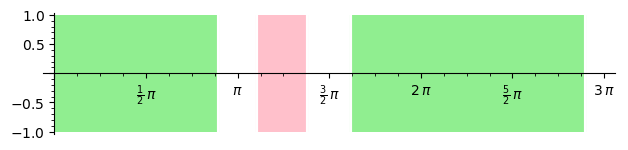

In [94]:
visualize2c(union2(intervals, 
                  shift_elem(RIF(pi/2), intervals))
           ).show(ticks=(pi/2,0.5), tick_formatter=pi)

In [101]:
def shift_pairs(t, xs, ys):
    return sum((intersect2(shift_elem(t, intersect2([x], [y])), [x])
               for x in xs for y in ys), [])

In [102]:
#def shift_pairs(t, xs, ys):
#    return ([(shift_elem(t, x.intersection(y)).intersection(x), True)
#             for (y,by) in ys if x.overlaps(y)
#                 and shift_elem(t, x.intersection(y)).intersection(x)
#                 and by
#             for x,bx in xs if bx]
#         ++ [(x.intersection(y), False)
#             for x,by in xs if x.overlaps(y) and bx
#             for y,by in ys if not by])

In [103]:
[(x.str(style='brackets'), b)
 for x, b in shift_pairs(RIF(pi/4),intervals, intervals)]

[('[0.38007908243635935 .. 1.9761154077559846]', True),
 ('[0.38007908243635935 .. 1.9761154077559846]', True),
 ('[2.7362735726287046 .. 5.1177080613457769]', False),
 ('[0.38007908243635935 .. 1.9761154077559846]', True),
 ('[2.7362735726287046 .. 5.9031062247432252]', False),
 ('[2.7362735726287046 .. 5.9031062247432252]', False),
 ('[2.7362735726287046 .. 5.9031062247432252]', False),
 ('[6.6632643896159482 .. 8.2593007149355700]', True),
 ('[6.6632643896159482 .. 8.2593007149355700]', True),
 ('[2.7362735726287046 .. 5.1177080613457769]', False),
 ('[6.6632643896159482 .. 8.2593007149355700]', True)]

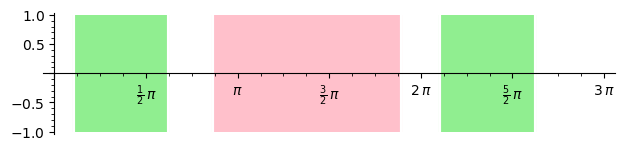

In [104]:
visualize2c(shift_pairs(RIF(pi/4),intervals, intervals)
           ).show(ticks=(pi/2,0.5), tick_formatter=pi)

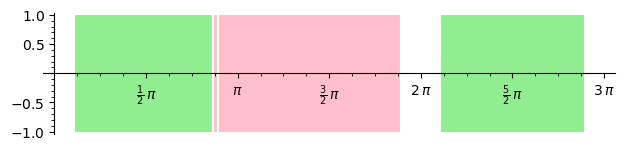

In [105]:
visualize2c(shift_pairs(RIF(0,pi/4),intervals, intervals)
           ).show(ticks=(pi/2,0.5), tick_formatter=pi)

In [106]:
from collections import namedtuple

How to import flowpipes?

 - Symbolically, then use computer algebra library in python?
 - Make sure we start with polytopes or even intervals?

In [295]:
R.<x> = QQ[]

In [356]:
class TM(object):
    def __init__(self, f, I):
        assert len(f.variables()) == 1
        self._f = f # a polynomial
        self._I = I # an interval
        
    @property
    def var(self):
        return self._f.variables()[0]
    
    @property
    def f(self):
        return self._f
    
    @property
    def I(self):
        return self._I
    
    def __add__(self, other):
        try:
            return TM(self.f + other.f, self.I + other.I)
        except AttributeError:
            return TM(self.f + other, self.I)
        
    def mul(self, other, domain, order=None):
        p = self.f*other.f
        if order is None:
            pe = R(0)
        else:
            pe = p - p.truncate(order + 1) 
        return TM(p - pe, self.I*other.f(domain) + self.f(domain)*other.I + self.I*other.I + pe.subs({self.var: domain}))
        
        
 #   def __mul__(self, other):
 #       try:
 #           return TM(self.f * other.f, self.I * other.I)
 #       except AttributeError:
 #           return TM(self.f * other, self.I)
        
    def __sub__(self, other):
        try:
            return TM(self.f - other.f, self.I + other.I)
        except AttributeError:
            return TM(self.f - other, self.I)
    
    def __iter__(self):
        yield self.f
        yield self.I
    
    def __repr__(self):
        return 'TM({}, {})'.format(*self)
    
    def __str__(self):
        return '{} + {}'.format(self.f, self.I.str(style='brackets'))
    
    def __call__(self, x):
        return RIF(self.f(**{str(self.var): x}) + self.I)
    
    def plot(self, xmin, xmax, **kwargs):
        return plot([(lambda x: self(x).lower()),
                     (lambda x: float(self.f.subs({self.var: x}))),
                     (lambda x: self(x).upper())],
                    xmin=xmin, xmax=xmax,
                    color=['blue', 'blue', 'blue'],
                    linestyle=['--', '-', '--'],
                    **kwargs)
    
    def derivative(self):
        return TM(self.f.derivative(), self.I)

In [357]:
sinTM = TM(x - (1/factorial(3))*x**3 + (1/factorial(5))*x**5, RIF(-0.6,0.6))
str(sinTM)
#type(sinTM(1))
#sinTM(1).str(style='brackets')

'1/120*x^5 - 1/6*x^3 + x + [-0.59999999999999998 .. 0.59999999999999998]'

In [384]:
sinTM.mul(sinTM, RIF(-pi,pi), 10)

TM(41/302400*x^10 - 1/315*x^8 + 2/45*x^6 - 1/3*x^4 + x^2, 0.?e1)

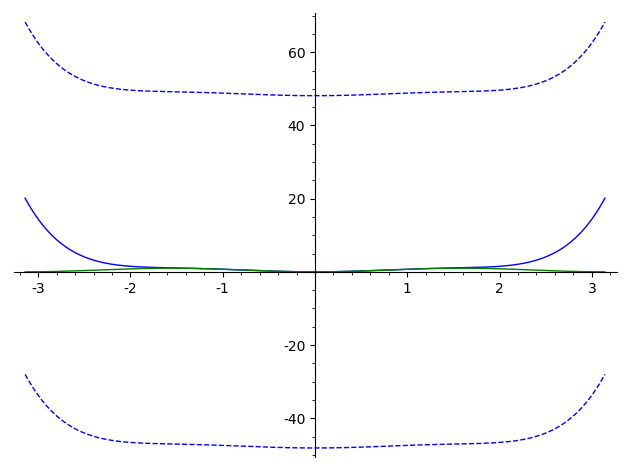

In [378]:
sinTM.mul(sinTM, RIF(-pi,pi), 6).plot(-pi, pi) + plot(sin(x)*sin(x), (x, -pi, pi), color='green')

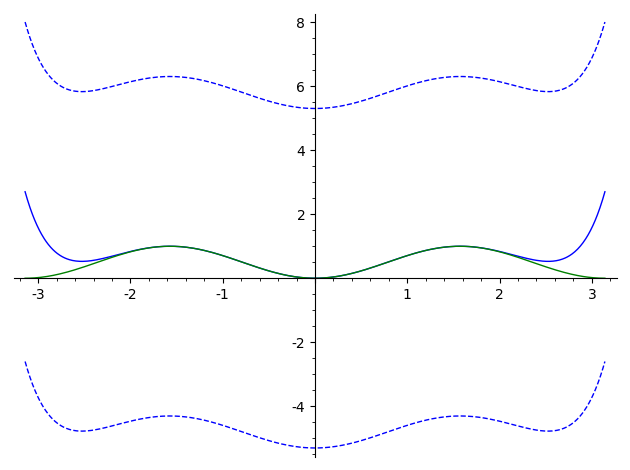

In [379]:
sinTM.mul(sinTM, RIF(-pi,pi), 10).plot(-pi, pi) + plot(sin(x)*sin(x), (x, -pi, pi), color='green')

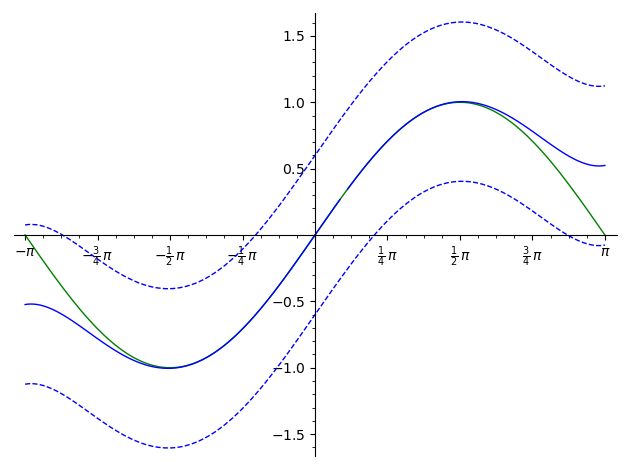

In [335]:
plot(sin, xmin=-pi, xmax=pi, color='green') + sinTM.plot(-pi, pi, ticks=(pi/4,0.5), tick_formatter=pi)

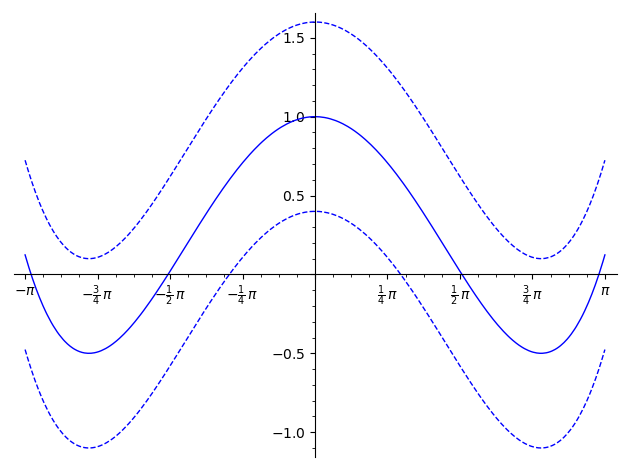

In [301]:
sinTM.derivative().plot(-pi, pi, ticks=(pi/4,0.5), tick_formatter=pi)

In [302]:
sinTM(-pi/4).str(style='brackets')

'[-1.3071430457793605 .. -0.10714304577936017]'

In [303]:
sinTM.derivative()(-pi/4).str(style='brackets')

'[0.10742920670977296 .. 1.3074292067097735]'

In [304]:
newton(sinTM, sinTM.derivative(), RIF(-pi/4,-3*pi/4), 10).str()

f(0) = [-2.3561944901923449 .. -0.78539816339744839]
f(1) = [-2.3561944901923449 .. -0.78539816339744839]
f(2) = [-2.3561944901923449 .. -0.78539816339744839]
f(3) = [-2.3561944901923449 .. -0.78539816339744839]
f(4) = [-2.3561944901923449 .. -0.78539816339744839]
f(5) = [-2.3561944901923449 .. -0.78539816339744839]
f(6) = [-2.3561944901923449 .. -0.78539816339744839]
f(7) = [-2.3561944901923449 .. -0.78539816339744839]
f(8) = [-2.3561944901923449 .. -0.78539816339744839]
f(9) = [-2.3561944901923449 .. -0.78539816339744839]


'-1.?e1'

In [366]:
sinTM = TM(x - (1/factorial(3))*x**3 + (1/factorial(5))*x**5 - (1/factorial(7))*x**7,
           (1/factorial(9))*sin(RIF(-pi,pi))*RIF(-pi,pi)**9)
str(sinTM)
#type(sinTM(1))
#sinTM(1).str(style='brackets')

'-1/5040*x^7 + 1/120*x^5 - 1/6*x^3 + x + [-0.082145886611128358 .. 0.082145886611128358]'

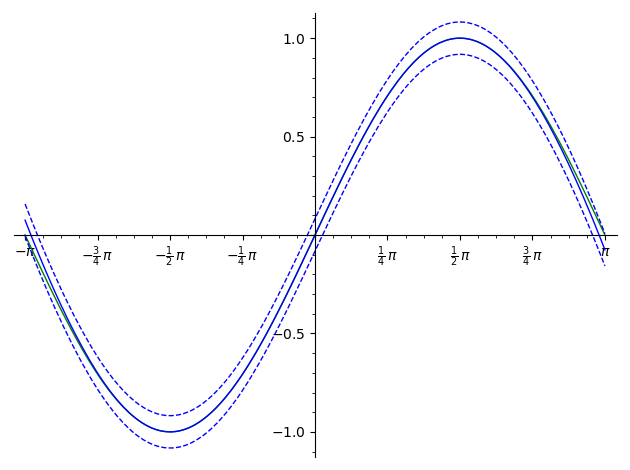

In [380]:
plot(sin, xmin=-pi, xmax=pi, color='green') + sinTM.plot(-pi, pi, ticks=(pi/4,0.5), tick_formatter=pi)

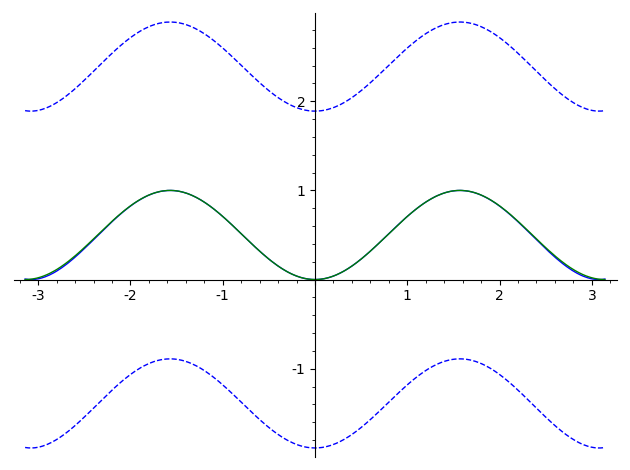

In [382]:
sinTM.mul(sinTM, RIF(-pi,pi), 15).plot(-pi, pi) + plot(sin(x)*sin(x), (x, -pi, pi), color='green')

In [307]:
a, b = newton(sinTM, sinTM.derivative(), RIF(-pi/4,pi/4), 10).endpoints()
a,b

f(0) = [-0.13846788869053892 .. 0.13846788869053892]
f(1) = [-0.090443926172562750 .. 0.090443926172562750]
f(2) = [-0.089898630057776500 .. 0.089898630057776500]
f(3) = [-0.089893786260804979 .. 0.089893786260804979]
f(4) = [-0.089893743367904914 .. 0.089893743367904914]
f(5) = [-0.089893742988089276 .. 0.089893742988089276]
f(6) = [-0.089893742984726008 .. 0.089893742984726008]
f(7) = [-0.089893742984696227 .. 0.089893742984696227]
f(8) = [-0.089893742984695963 .. 0.089893742984695963]
f(9) = [-0.089893742984695963 .. 0.089893742984695963]


(-0.0898937429846960, 0.0898937429846960)

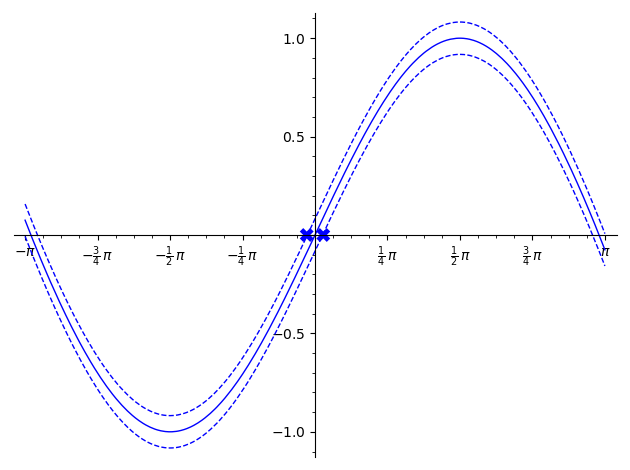

In [308]:
p = sinTM.plot(-pi, pi, ticks=(pi/4,0.5), tick_formatter=pi)
p += point((a, 0), marker='X', size=100)
p += point((b, 0), marker='X', size=100)
p

$$\frac{\mathrm d x}{\mathrm d t} = \cos{t}\quad x(0) = c \implies x(t) = \sin(t) + c$$

In [211]:
plot3d(lambda c, t: sin(t) + c, (0,1), (-pi,pi), opacity=0.9).show(viewer='threejs', online=True)

Graphics3d Object

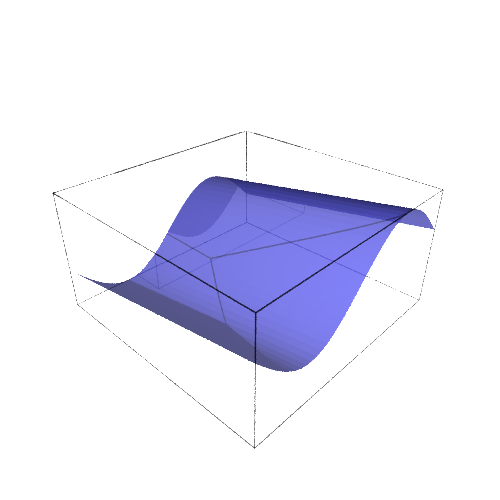

In [214]:
plot3d(lambda c, t: sin(t) + c, (0,1), (-pi,pi), opacity=0.9).show(viewer='tachyon')

In [212]:
plot3d(lambda c, t: sin(t + c), (0,1), (-pi,pi), opacity=0.9).show(viewer='threejs', online=True)

Graphics3d Object

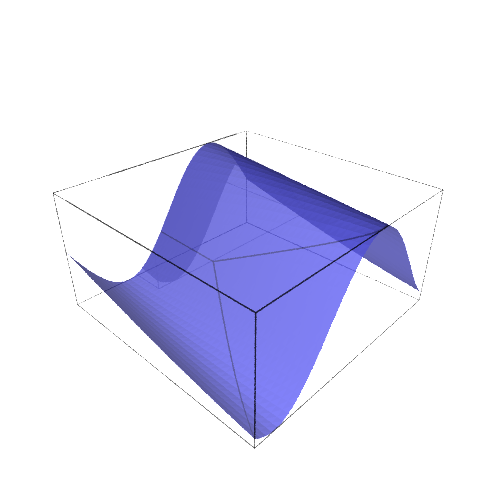

In [215]:
plot3d(lambda c, t: sin(t + c), (0,1), (-pi,pi), opacity=0.9).show(viewer='tachyon')

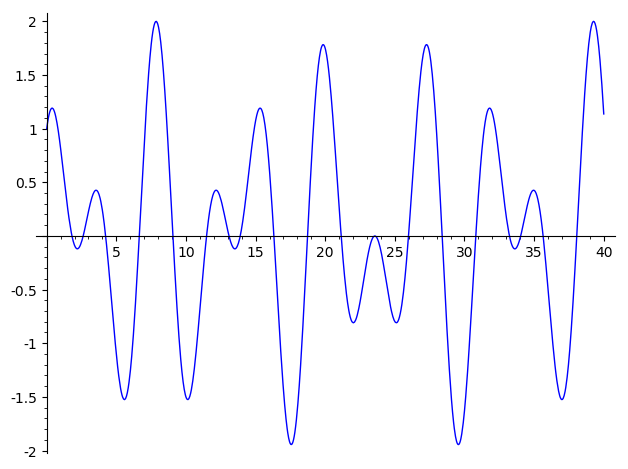

In [217]:
plot(sin(x) + cos(1.6*x), (x, 0, 40))

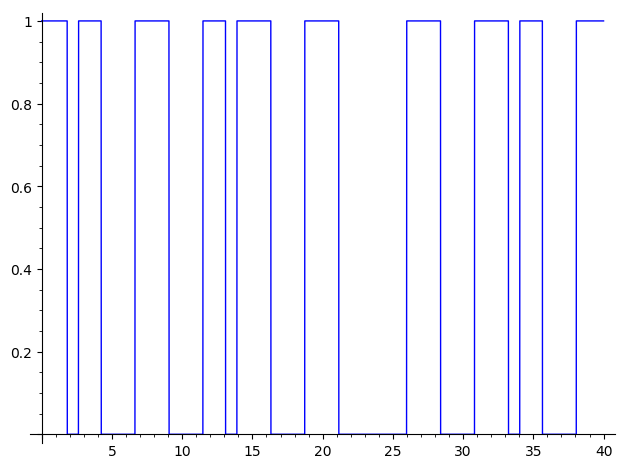

In [251]:
plot((lambda x: sin(x) + cos(1.6*x) >= 0), (0, 40))

In [223]:
var('x y c')

(x, y, c)

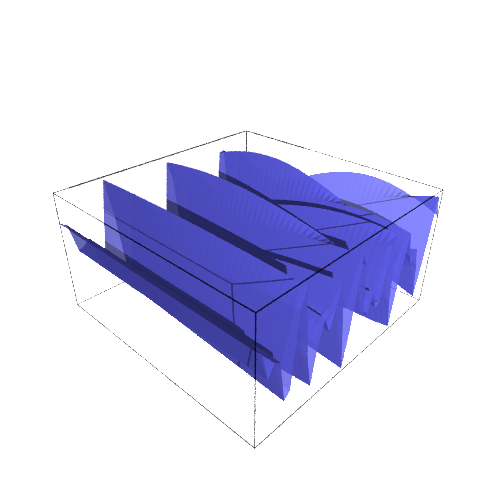

In [249]:
plot3d(sin(x) + cos(c*x), (c,1.5,1.6), (x,0,40), aspect=(1,4,20), opacity=0.9).show(viewer='tachyon')

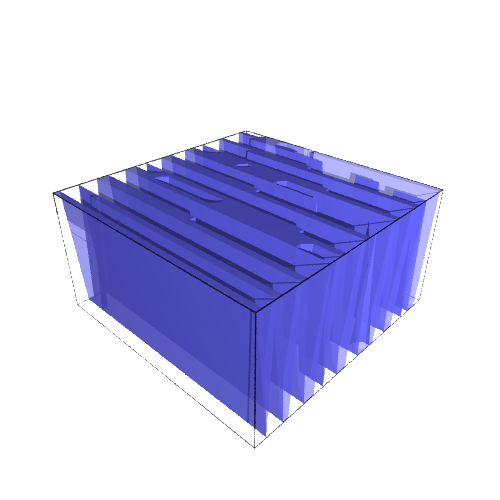

In [264]:
plot3d((lambda c, x: sin(x) + cos(c*x) >= 0), (1.5,1.6), (0,40), opacity=0.8, raydepth=10).show(viewer='tachyon')

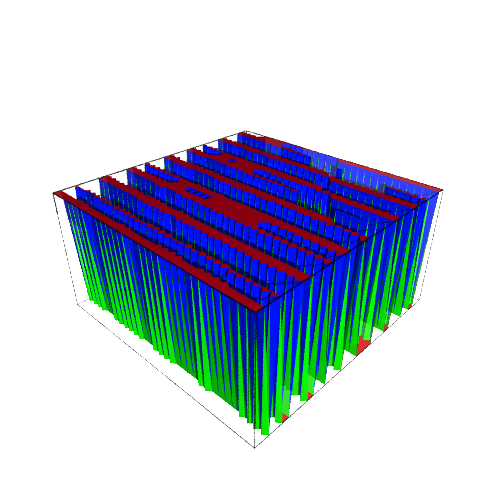

In [257]:
plot3d((lambda c, x: sin(x) + cos(c*x) >= 0), (c,1.5,1.6), (x,0,40), adaptive=True, opacity=0.9).show(viewer='tachyon')

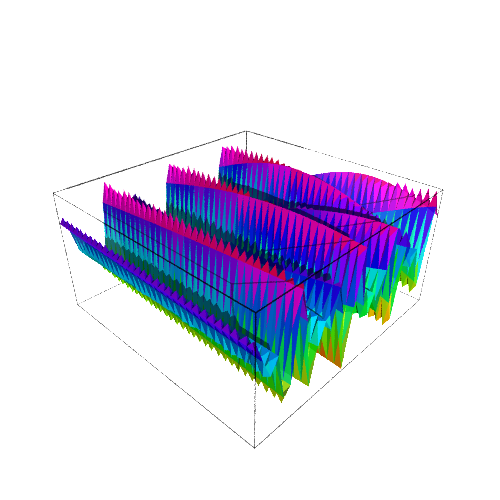

In [267]:
plot3d((lambda c, x: sin(x) + cos(c*x)), (1.5,1.6), (0,40), adaptive=True, opacity=0.95).show(viewer='tachyon')

In [254]:
plot3d((lambda c, x: sin(x) + cos(c*x) >= 0), (c,1.5,1.6), (x,0,40), adaptive=True, opacity=0.9).show(viewer='threejs', online=True)

Graphics3d Object

In [246]:
plot3d(sin(x) + cos(c*x), (c,1.5,1.6), (x,0,40), opacity=0.9, aspect=(1,2,1)).show(viewer='threejs', online=True)

Graphics3d Object

In [385]:
from functools import reduce
import operator

In [429]:
class TMSeq(object):
    def __init__(self, xs):
        self._tms = xs
    
    def __iter__(self):
        return iter(self._tms)
    
    def __repr__(self):
        return 'TMSeq({})'.format(repr(list(self)))
    
    def map(self, M):
        return TMSeq([(I, M(x)) for I, x in self])
    
    def __call__(self, x):
        if x in RIF:
            u = lambda x, y: x.union(y)
            return reduce(u, (y(x.intersection(I)) for I, y in self if x.overlaps(I)))
        for I, y in self:
            if x in I:
                return y(x)
            
    def plot(self, **kwargs):
        return reduce(operator.add, (y.plot(I.lower(), I.upper(), **kwargs) for I, y in self))

In [430]:
seq = TMSeq([(RIF(0,1), sinTM), (RIF(1,2), sinTM.mul(TM(x, RIF(0)), RIF(1,2)))])
seq

TMSeq([(1.?, TM(-1/5040*x^7 + 1/120*x^5 - 1/6*x^3 + x, 0.0?)), (2.?, TM(-1/5040*x^8 + 1/120*x^6 - 1/6*x^4 + x^2, 0.?))])

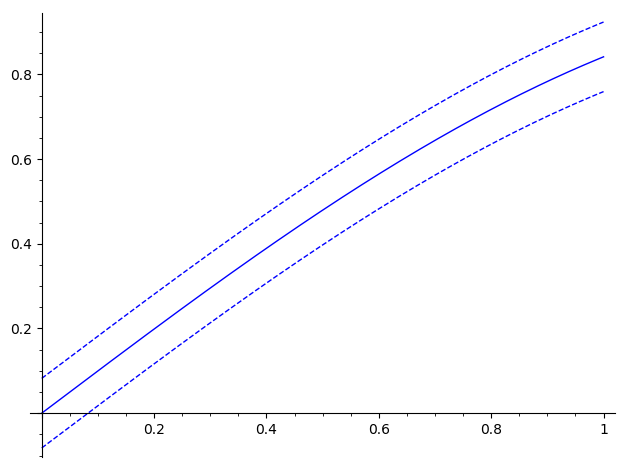

In [431]:
list(seq)[0][1].plot(0,1)

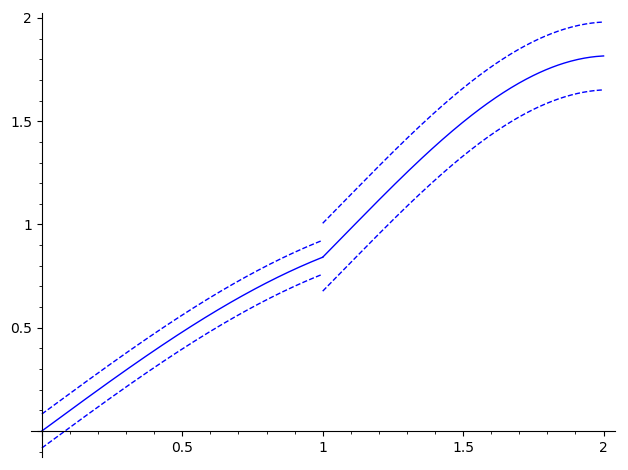

In [432]:
seq.plot()

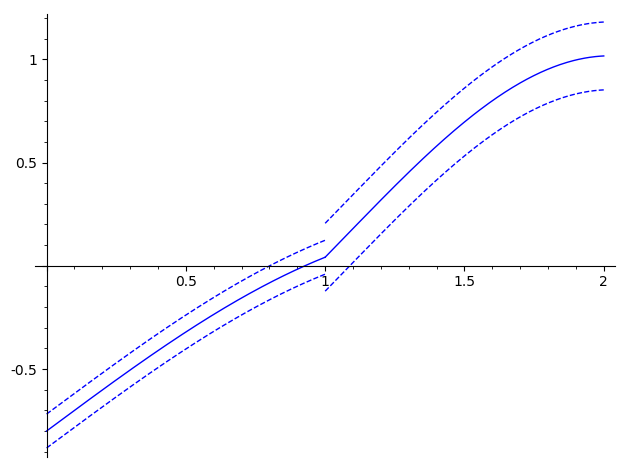

In [437]:
seq2 = seq.map(lambda x: x - 0.8)
plt = seq2.plot()
plt

In [434]:
seq2.map(lambda x: x.derivative())(RIF(0.5,1.5))

1.?e1

In [435]:
RIF(0) in RIF

True

In [441]:
a, b = newton(seq2, seq2.map(lambda x: x.derivative()), RIF(0.5,1.5), 10).endpoints()
a,b

f(0) = [0.51916639450203383 .. 1.2870221024425228]
f(1) = [0.74589867691294509 .. 1.1291219405363536]
f(2) = [0.74589867691294509 .. 1.1102710529171778]
f(3) = [0.74589867691294509 .. 1.1102710529171778]
f(4) = [0.74589867691294509 .. 1.1102710529171778]
f(5) = [0.74589867691294509 .. 1.1102710529171778]
f(6) = [0.74589867691294509 .. 1.1102710529171778]
f(7) = [0.74589867691294509 .. 1.1102710529171778]
f(8) = [0.74589867691294509 .. 1.1102710529171778]
f(9) = [0.74589867691294509 .. 1.1102710529171778]


(0.745898676912945, 1.11027105291718)

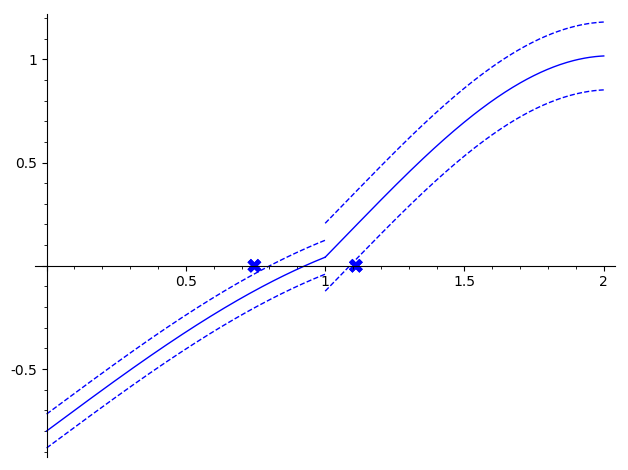

In [440]:
plt += point((a, 0), marker='X', size=100)
plt += point((b, 0), marker='X', size=100)
plt